# Human Tumor Microarray Data
A gene expression dataset collects together the expression values from a series of DNA microarray experiments, with each column representing an experiment. There are therefore several thousand rows representing individual genes, an tens of columns representing samples: in the particular example of Figure 1.3 there are 6830 genes (rows) and 64 samples (columns). The samples are 64 cancer tumors from different patients. The challenge here is to understand how the genes and samples are organized.

In [1]:
import pandas as pd
from matplotlib import transforms, pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm
import numpy as np

%matplotlib inline

# define plots common properties and color constants
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
GRAY1, GRAY4, GRAY7 = '#231F20', '#646369', '#929497'

## Load and Prepare Data

In [2]:
data = pd.read_csv("../data/nci.data.csv", sep=',')
labels = pd.read_csv("../data/nci.label.txt")
labels['type'] = labels['type'].str.strip()
# combine some groups
labels.loc[labels['type'] == 'K562A-repro', 'type'] = 'K562'
labels.loc[labels['type'] == 'K562B-repro', 'type'] = 'K562'
labels.loc[labels['type'] == 'MCF7A-repro', 'type'] = 'MCF7'
labels.loc[labels['type'] == 'MCF7D-repro', 'type'] = 'MCF7'
sample_columns = [f's{i+1}' for i in range(64)]

X = data[sample_columns].values
y = labels['type'].values

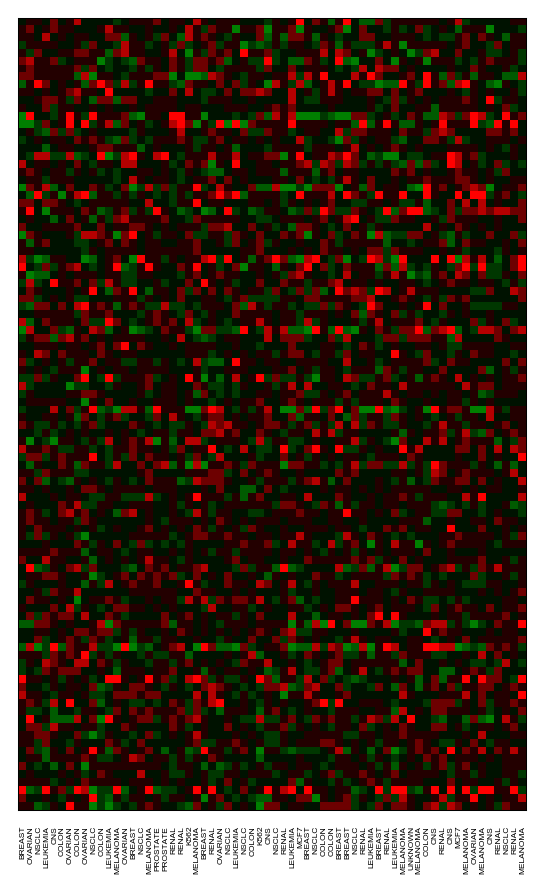

In [3]:
# PAGE 6. FIGURE 1.3. DNA microarray data: expression matrix of 6830 genes
#         (rows) and 64 samples (columns), for the human tumor data. Only a
#         random sample of 100 rows are shown. The diaplay is a heat map,
#         ranging from bright green (negative, under expressed) to bright red
#         (positive, over expressed). Missing values are gray. The rows and
#         columns are displayed in a randomly chosen order.
cmap = LinearSegmentedColormap.from_list('cm', ['g', 'black', 'r'], N=256)
bounds = np.arange(-2, 2.5, .5)
norm = BoundaryNorm(bounds, cmap.N)

rand_rows = np.random.choice(range(X.shape[0]), 100, replace=False)
rand_columns = np.random.choice(range(X.shape[1]), X.shape[1], replace=False)
rand_data = X[rand_rows][:, rand_columns]

fig, ax = plt.subplots(figsize=(15, 7), dpi=150)
ax.imshow(rand_data, interpolation='none', norm=norm, cmap=cmap)
ax.tick_params(bottom=False, left=False, labelleft=False)
plt.setp(ax, xticks=list(range(64)))
_ = ax.set_xticklabels(y[rand_columns], rotation=90, ha='center', size=4)

## K-means Clustering

In [4]:
from sklearn.cluster import KMeans
from collections import Counter

In [5]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=1).fit(X.T)
clusters = kmeans.predict(X.T)
cluster_counts = [Counter(y[clusters == c]) for c in range(3)]

In [6]:
# PAGE 513. TABLE 14.2. Human tumor data: number of cancer cases of each type,
#           in each of the three clusters from K-means clustering.
for grp in [['BREAST', 'CNS', 'COLON', 'K562', 'LEUKEMIA', 'MCF7'],
            ['MELANOMA', 'NSCLC', 'OVARIAN', 'PROSTATE', 'RENAL', 'UNKNOWN']]:
    print('-'*70)
    print('Cluster  |' + ''.join([f'{n:^10}' for n in grp]))
    print('-'*70)
    for c in range(n_clusters):
        counts = cluster_counts[c]
        cnts = [counts[t] if t in counts else 0 for t in grp]
        print(f'{c+1:<9}|' + ''.join([f'{c:^10}' for c in cnts]))

----------------------------------------------------------------------
Cluster  |  BREAST     CNS      COLON      K562    LEUKEMIA    MCF7   
----------------------------------------------------------------------
1        |    3         5         0         0         0         0     
2        |    2         0         0         0         0         0     
3        |    2         0         7         2         6         2     
----------------------------------------------------------------------
Cluster  | MELANOMA   NSCLC    OVARIAN   PROSTATE   RENAL    UNKNOWN  
----------------------------------------------------------------------
1        |    1         8         6         2         9         1     
2        |    7         0         0         0         0         0     
3        |    0         1         0         0         0         0     
